In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv(r'Data\NEET RR 5.0 - Sheet1.csv')
df['time'] = df['Total Time']
df.drop('Total Time', axis=1, inplace=True)
df.head()

,Lesson Number,Subject,Topic,Hours,Minutes,time
0,1.0,Anatomy,Embryology,4.0,10.0,4.17
1,2.0,Anatomy,Neuroanatomy,4.0,3.0,4.05
2,3.0,Anatomy,Neuroanatomy 2,3.0,43.0,3.72
3,4.0,Anatomy,Back and Thorax,2.0,30.0,2.50
4,5.0,Anatomy,Upper and Lower limb,2.0,2.0,2.03


In [34]:
missing = df[df.isnull().any(axis=1)]
missing

,Lesson Number,Subject,Topic,Hours,Minutes,time
123,NaN,NaN,NaN,NaN,NaN,278.92


In [35]:
df = df.dropna()
df.isnull().sum()

In [44]:
grouped_values = df.groupby('Subject')['time'].sum().reset_index()
sorted = grouped_values.sort_values(by='time',ascending=False)
sorted

,Subject,time
18,Surgery,34.09
6,Medicine,33.31
1,Anatomy,31.42
12,Pathology,25.90
11,PSM,19.42
8,OBG,16.38
7,Microbiology,15.60
4,ENT,13.29
15,Physio,11.19
2,Biochem,10.99


In [58]:
summary = sorted.describe()
summary_dict = summary.to_dict()
summary_dict

{'time': {'count': 19.0,
  'mean': 14.677368421052632,
  'std': 9.671168975709458,
  'min': 4.3,
  '25%': 8.77,
  '50%': 10.99,
  '75%': 17.9,
  'max': 34.089999999999996}}

In [94]:
q1 = summary_dict['time']['25%']
q2 = summary_dict['time']['50%']
q3 = summary_dict['time']['75%']
IQR = q3 - q1
box_max = q3 + 1.5*IQR

<Axes: >

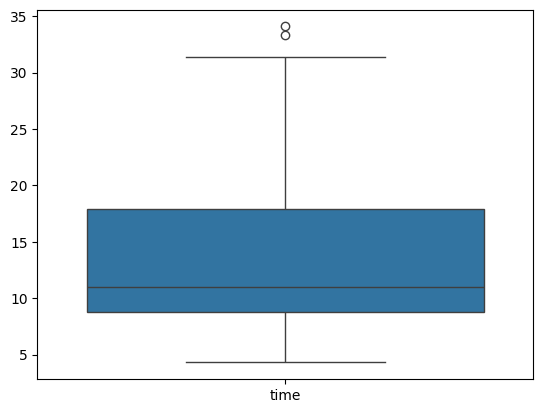

In [93]:
sns.boxplot(data=sorted)

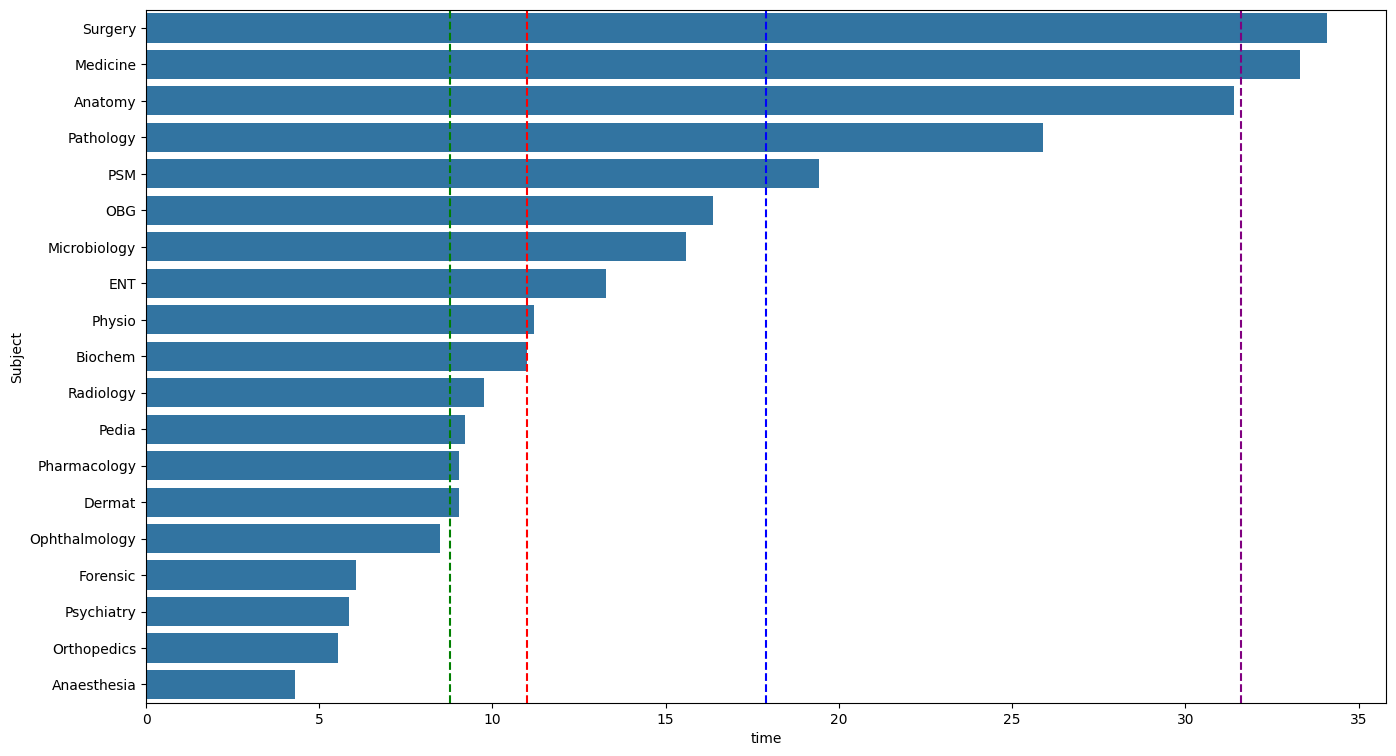

In [69]:
plt.figure(figsize=(16,9))
sns.barplot(x='time', y='Subject', data=sorted)

plt.axvline(x=box_max, color='purple', linestyle='--')
plt.axvline(x=q2, color='red', linestyle='--')
plt.axvline(x=q1, color='green', linestyle='--')
plt.axvline(x=q3, color='blue', linestyle='--')

In [84]:
new_df  = df.loc[:, ['Subject','Topic','time']]
new_df = new_df.groupby('Subject')['time'].sum().reset_index()
new_df

,Subject,time
0,Anaesthesia,4.30
1,Anatomy,31.42
2,Biochem,10.99
3,Dermat,9.04
4,ENT,13.29
5,Forensic,6.05
6,Medicine,33.31
7,Microbiology,15.60
8,OBG,16.38
9,Ophthalmology,8.50


In [85]:
new_df['Subject'].unique()

array(['Anaesthesia', 'Anatomy', 'Biochem', 'Dermat', 'ENT', 'Forensic',
       'Medicine', 'Microbiology', 'OBG', 'Ophthalmology', 'Orthopedics',
       'PSM', 'Pathology', 'Pedia', 'Pharmacology', 'Physio',
       'Psychiatry', 'Radiology', 'Surgery'], dtype=object)

In [99]:
first_year = ['Anatomy', 'Biochem', 'Physio']
second_year = ['Pathology','Microbiology','Forensic','Pharmacology']
third_year = ['Ophthalmology','ENT','PSM']
fourth_year = ['Medicine','Surgery','Pedia','OBG','Orthopedics']
sarp = ['Anaesthesia','Radiology','Psychiatry','Dermat']

subject_year_mapping = {}
subject_year_mapping.update({subject: 1 for subject in first_year})
subject_year_mapping.update({subject: 2 for subject in second_year})
subject_year_mapping.update({subject: 3 for subject in third_year})
subject_year_mapping.update({subject: 4 for subject in fourth_year})
subject_year_mapping.update({subject: 5 for subject in sarp})

new_df['year'] = new_df['Subject'].map(subject_year_mapping)
new_df = new_df.sort_values('year')
new_df

,Subject,time,year
1,Anatomy,31.42,1
2,Biochem,10.99,1
15,Physio,11.19,1
5,Forensic,6.05,2
14,Pharmacology,9.04,2
7,Microbiology,15.60,2
12,Pathology,25.90,2
9,Ophthalmology,8.50,3
4,ENT,13.29,3
11,PSM,19.42,3


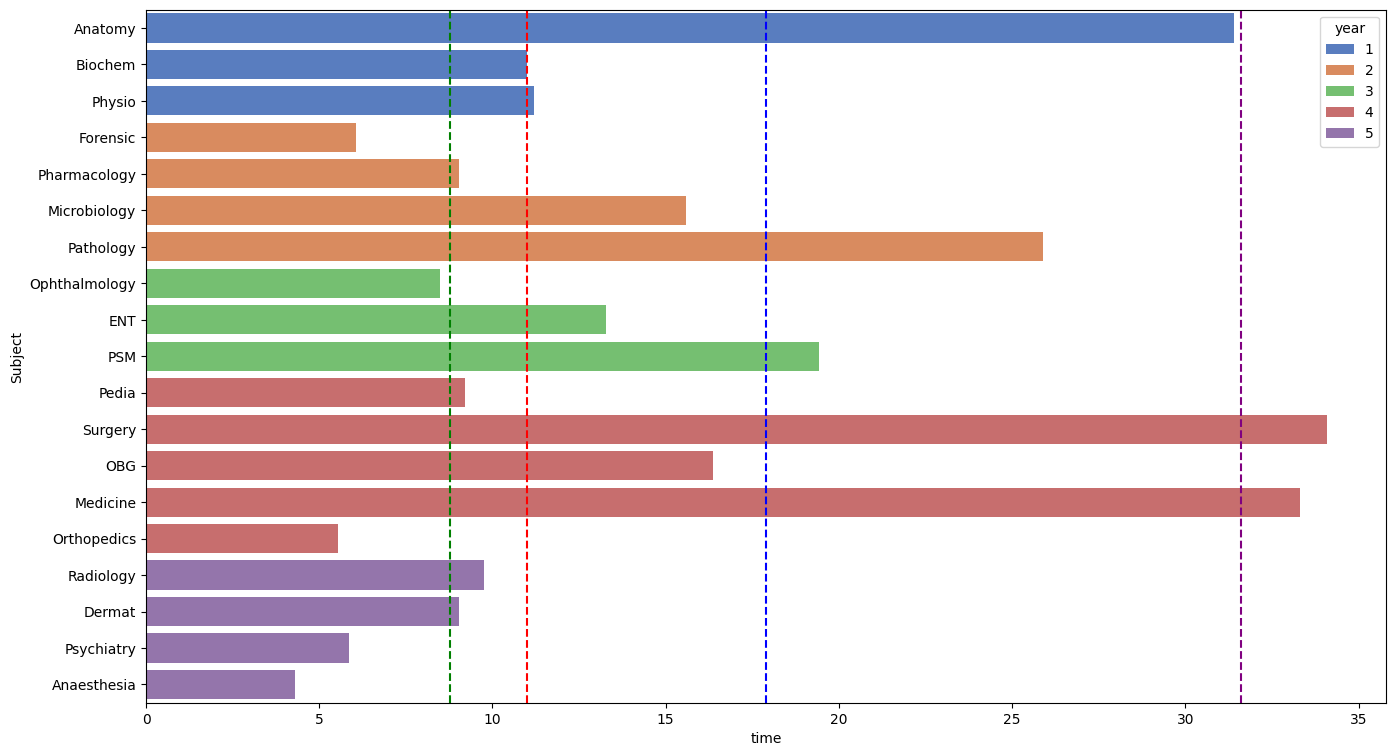

In [100]:
plt.figure(figsize=(16,9))
sns.barplot(x='time', y='Subject', data=new_df, hue='year', palette='muted')

plt.axvline(x=box_max, color='purple', linestyle='--')
plt.axvline(x=q2, color='red', linestyle='--')
plt.axvline(x=q1, color='green', linestyle='--')
plt.axvline(x=q3, color='blue', linestyle='--')